# Data Science and Business Analytics Task @GRIP

### **TASK_01:** Prediction using Supervised Model

Predict the percentage of an student based on the no. of study hours. What will be predicted score if a student studies for 9.25 hrs/day?

Model used: **Linear Regression Model**

**Tools**

- Python Libraries: Numpy and Pandas
- Visualization tools: Matplotlib, Seaborn
- sklearn: train_test_split, LinearRegression, metrics and r2_score

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
#load the data
data_link = "http://bit.ly/w-data"
read_data = pd.read_csv(data_link)
read_data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Take a look for basic stats and information to understand the data

In [5]:
read_data.describe()  #stats

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
read_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
read_data.shape

(25, 2)

In [8]:
read_data.columns

Index(['Hours', 'Scores'], dtype='object')

**Data Visualization**

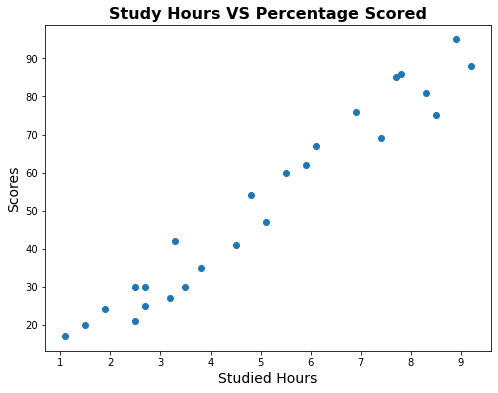

In [25]:
#Hours Vs Percentage of Scores
plt.figure(figsize = (8,6))
plt.scatter(read_data['Hours'], read_data['Scores'])
plt.title('Study Hours VS Percentage Scored', fontsize = 16, weight = 'bold')
plt.xlabel('Studied Hours', fontsize = 14)
plt.ylabel('Scores', fontsize = 14)
plt.show()

<AxesSubplot:>

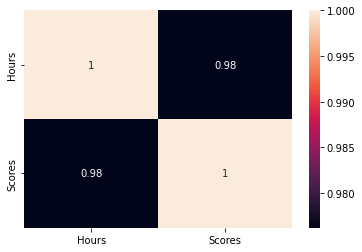

In [28]:
correlation = read_data.corr()
sns.heatmap(correlation,annot=True)

**Splitting Training and Test data**

In [38]:
#X will take all the values except for the last column which is our dependent variable (target variable)
X = read_data.iloc[:, :-1].values #hours
y = read_data.iloc[:, -1].values  #pedict score

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

**Train the model with training dataset**

In [32]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

**Plotting the regression line (best fit line)**

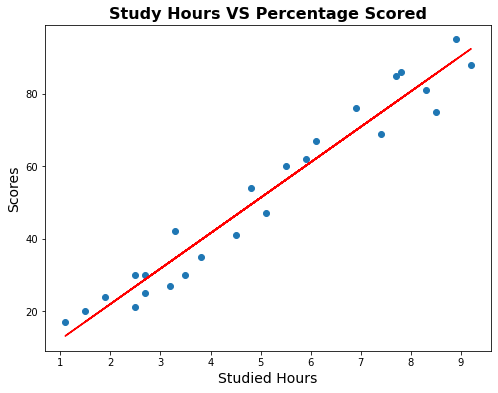

In [51]:
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.figure(figsize = (8,6))
plt.scatter(X, y)
plt.plot(X, line,color = 'red');
plt.title('Study Hours VS Percentage Scored', fontsize = 16, weight = 'bold')
plt.xlabel('Studied Hours', fontsize = 14)
plt.ylabel('Scores', fontsize = 14)
plt.show()

**Predict the test set result**

In [39]:
y_pred = regressor.predict(X_test)
print(y_pred)

[17.05366541 33.69422878 74.80620886 26.8422321  60.12335883 39.56736879
 20.96909209 78.72163554]


Data Visualization of **Training set result**

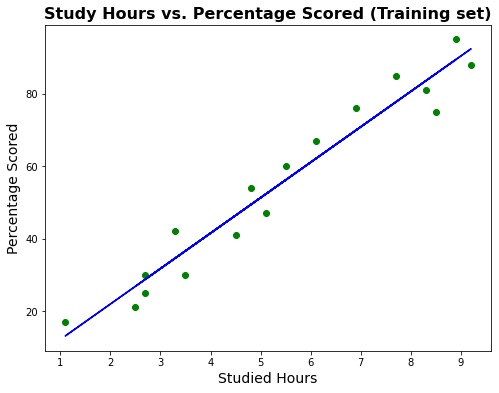

In [42]:
plt.figure(figsize = (8,6))
plt.scatter(X_train, y_train, color = 'green')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Study Hours vs. Percentage Scored (Training set)', fontsize = 16, weight = 'bold')
plt.xlabel('Studied Hours', fontsize = 14)
plt.ylabel('Percentage Scored', fontsize = 14)
plt.show()

Data Visualization of **Test set result**

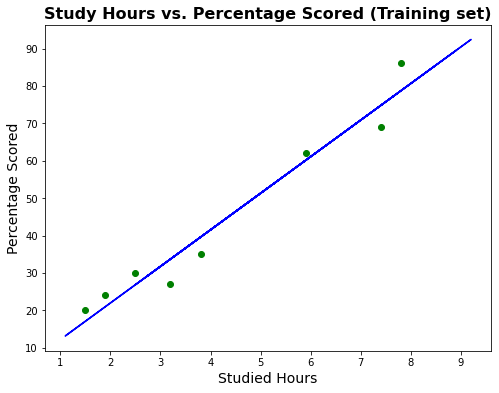

In [43]:
plt.figure(figsize = (8,6))
plt.scatter(X_test, y_test, color = 'green')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Study Hours vs. Percentage Scored (Training set)', fontsize = 16, weight = 'bold')
plt.xlabel('Studied Hours', fontsize = 14)
plt.ylabel('Percentage Scored', fontsize = 14)
plt.show()

**Actual_values VS Predicted_values**

In [44]:
dataset = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
dataset

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


### Predicting the Score

What will be predicted score if a student studies for 9.25 hrs/day?

In [48]:
pred_score = np.array(9.25)
pred_score = dataset.reshape(-1, 1)
prediction = regressor.predict(pred_score)
print("If a student studies for 9.25 hrs/day, then the predicted score would be {}".format(prediction))

If a student studies for 9.25 hrs/day, then the predicted score would be [92.91505723]


**Error Metrics**

In [49]:
#by using metrics library from sklearn class 
#we calculate the error in result
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.419727808027652


In [50]:
#check how good the linear regression model is fitting on the data?
#using R-square statistics
from sklearn.metrics import r2_score
print("The R-Square of the model is: ",r2_score(y_test,y_pred))

The R-Square of the model is:  0.9568211104435257


# Result

In [56]:
hours = 9.25
print('Study hours {} per day'.format(hours))
print('Predicated Score {}'.format(prediction))

Study hours 9.25 per day
Predicated Score [92.91505723]
